In [ ]:
import csv
import os

from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

RESULT_DIR = '/content/drive/MyDrive/dna-nn/results/'
FIGURE_DIR = '/content/drive/MyDrive/dna-nn/figures/'

%matplotlib inline

mpl.style.use('seaborn-white')
plt.rcParams['font.size'] = 12

In [ ]:
model_files = [file.split('.')[0].split('-')[:2]
               for file in os.listdir(RESULT_DIR)
               if file.endswith('dynamics.csv')]

df = pd.DataFrame(model_files, columns=['model', 'dataset'])
df['done'] = 1
df.sort_values(['dataset', 'model'], inplace=True)

df.set_index(['dataset', 'model'], inplace=True)
index = pd.MultiIndex.from_product([df.index.levels[0], df.index.levels[1]])
df_multi_idx = df.reindex(index, fill_value=0)

df_long = df_multi_idx.reset_index()
df = df_long.pivot(index='model', columns='dataset', values='done')
# df = df.style.applymap(lambda val: 'color:black' if val else 'color:red')
df

dataset,histone,motif_discovery,splice
model,,,
cnn_deepdbp,1,1,1
cnn_nguyen_2_conv2d,1,1,1
cnn_nguyen_conv1d_2_conv2d,1,1,1
cnn_zeng_2_conv2d,1,1,1
cnn_zeng_3_conv2d,1,1,1
cnn_zeng_4_conv2d,1,1,1
cnn_zeng_4_conv2d_l2,1,1,1
deepram_conv1d_embed,1,1,1
deepram_conv1d_onehot,1,1,1


In [ ]:
df_long.sort_values(['model', 'dataset'], inplace=True)
df_long = df_long.reindex(columns=['model', 'dataset', 'done'])
df_long.set_axis(range(len(df_long)), inplace=True)
df_long

,model,dataset,done
0,cnn_deepdbp,histone,1
1,cnn_deepdbp,motif_discovery,1
2,cnn_deepdbp,splice,1
3,cnn_nguyen_2_conv2d,histone,1
4,cnn_nguyen_2_conv2d,motif_discovery,1
5,cnn_nguyen_2_conv2d,splice,1
6,cnn_nguyen_conv1d_2_conv2d,histone,1
7,cnn_nguyen_conv1d_2_conv2d,motif_discovery,1
8,cnn_nguyen_conv1d_2_conv2d,splice,1
9,cnn_zeng_2_conv2d,histone,1


In [ ]:
def plot_dynamics(file, ax):
    tmp = pd.read_csv(file)[['accuracy', 'val_accuracy']]
    tmp.plot(ax=ax, legend=False)

def plot_roc(file, ax):
    tmp = pd.read_csv(file)
    if 'ovr' in tmp.columns:
        for cls in set(tmp['ovr']):
            ax.plot((tmp.loc[tmp['ovr']==cls])['fpr'], 
                    (tmp.loc[tmp['ovr']==cls])['tpr'])
    else:
        ax.plot(tmp['fpr'], tmp['tpr'])
    ax.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

def plot_pr(file, ax):
    tmp = pd.read_csv(file)
    if 'ovr' in tmp.columns:
        for cls in set(tmp['ovr']):
            ax.plot((tmp.loc[tmp['ovr']==cls])['recall'], 
                    (tmp.loc[tmp['ovr']==cls])['precision'])
    else:
        ax.plot(tmp['recall'], tmp['precision'])

def plot_results(r, c, file_type, plot_func, xlabel, ylabel, save_to):
    fig, axs = plt.subplots(r, c, sharex=True, sharey=True, figsize=(12, 28))
    axs = axs.ravel()
    for idx, row in df_long.iterrows():
        if idx < c:
            text = df_multi_idx.index.levels[0][idx]
            axs[idx].text(0.5, 1.05, text, transform=axs[idx].transAxes, ha='center')
        if (idx+1) % c == 0:
            text = df_multi_idx.index.levels[1][(idx+1)//c-1]
            axs[idx].text(1.05, 0.5, text, transform=axs[idx].transAxes)
        if idx % c == 0:
            axs[idx].set_ylabel(ylabel)
        for ax in axs[-c:]:
            ax.set_xlabel(xlabel)
        axs[idx].spines['top'].set_visible(False)
        axs[idx].spines['right'].set_visible(False)
        
        model = row['model']
        dataset = row['dataset']
        file = f'{RESULT_DIR}{model}-{dataset}-{file_type}.csv'
        if not os.path.exists(file):
            continue
        plot_func(file, axs[idx])
    if file_type == 'dynamics':
        axs[0].legend()
    fig.savefig(FIGURE_DIR + save_to, bbox_inches='tight')
    plt.close(fig)

In [ ]:
r, c = len(df_multi_idx.index.levels[1]), len(df_multi_idx.index.levels[0])
plot_results(r, c, 'dynamics', plot_dynamics, 'epoch', 'accuracy', 'dynamics.png')
plot_results(r, c, 'roc', plot_roc, 'fpr', 'tpr', 'roc.png')
plot_results(r, c, 'pr', plot_pr, 'recall', 'precision', 'pr.png')

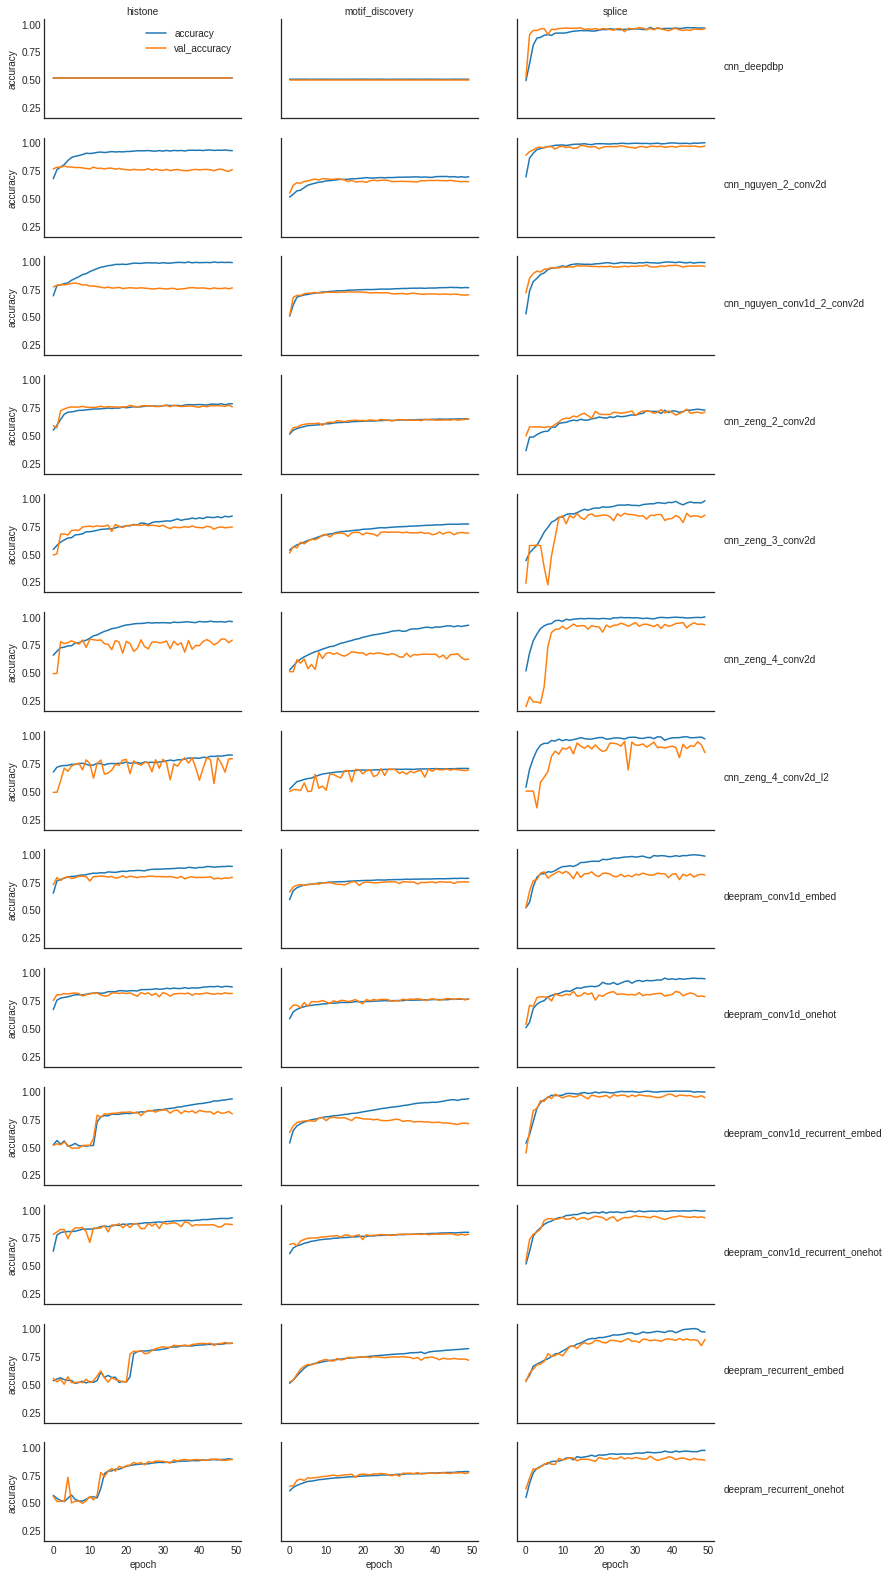

In [ ]:
Image(FIGURE_DIR + 'dynamics.png', width=450)

In [ ]:
accuracy_files = [file for file in os.listdir(RESULT_DIR) if file.endswith('accuracy.csv')]
accuracies = []
for a in accuracy_files:
    model, dataset = a.split('-')[:2]
    with open(RESULT_DIR + a, 'r') as f:
        reader = csv.DictReader(f)
        d = next(reader)
        for k in d:
            d[k] = float(d[k])
        d['model'] = model
        d['dataset'] = dataset
        accuracies.append(d)
acc = pd.DataFrame(accuracies)
acc = acc.reindex(columns=['dataset', 'model', 'accuracy', 'val_accuracy', 'test_accuracy'])
acc.sort_values(['dataset', 'model'], inplace=True)
acc.set_index(['dataset', 'model'], inplace=True)
acc

accuracy  ...  test_accuracy
dataset         model                                      ...               
histone         cnn_deepdbp                      0.512843  ...       0.512249
                cnn_nguyen_2_conv2d              0.930488  ...       0.788864
                cnn_nguyen_conv1d_2_conv2d       0.989974  ...       0.799109
                cnn_zeng_2_conv2d                0.782011  ...       0.751002
                cnn_zeng_3_conv2d                0.838155  ...       0.746548
                cnn_zeng_4_conv2d                0.959324  ...       0.797327
                cnn_zeng_4_conv2d_l2             0.822591  ...       0.799109
                deepram_conv1d_embed             0.889430  ...       0.811581
                deepram_conv1d_onehot            0.876158  ...       0.823163
                deepram_conv1d_recurrent_embed   0.930010  ...       0.824053
                deepram_conv1d_recurrent_onehot  0.928005  ...       0.871269
                deepram_recurrent_embed          0.865177  ...       0.856570
                deepram_recurrent_onehot         0.893249  ...       0.865479
motif_discovery cnn_deepdbp                      0.501098  ...       0.499314
                cnn_nguyen_2_conv2d              0.692906  ...       0.658528
                cnn_nguyen_conv1d_2_conv2d       0.762113  ...       0.712494
                cnn_zeng_2_conv2d                0.647117  ...       0.643501
                cnn_zeng_3_conv2d                0.767124  ...       0.686865
                cnn_zeng_4_conv2d                0.923379  ...       0.680595
                cnn_zeng_4_conv2d_l2             0.702029  ...       0.697666
                deepram_conv1d_embed             0.780999  ...       0.739611
                deepram_conv1d_onehot            0.760557  ...       0.760946
                deepram_conv1d_recurrent_embed   0.931373  ...       0.756377
                deepram_conv1d_recurrent_onehot  0.797155  ...       0.776819
                deepram_recurrent_embed          0.817696  ...       0.741777
                deepram_recurrent_onehot         0.778291  ...       0.768383
splice          cnn_deepdbp                      0.966552  ...       0.931078
                cnn_nguyen_2_conv2d              0.995573  ...       0.949875
                cnn_nguyen_conv1d_2_conv2d       0.990162  ...       0.938596
                cnn_zeng_2_conv2d                0.732907  ...       0.640351
                cnn_zeng_3_conv2d                0.975406  ...       0.848371
                cnn_zeng_4_conv2d                0.997541  ...       0.899749
                cnn_zeng_4_conv2d_l2             0.986719  ...       0.947368
                deepram_conv1d_embed             0.992130  ...       0.843358
                deepram_conv1d_onehot            0.949828  ...       0.840852
                deepram_conv1d_recurrent_embed   0.999508  ...       0.943609
                deepram_conv1d_recurrent_onehot  0.992622  ...       0.937343
                deepram_recurrent_embed          0.997541  ...       0.877193
                deepram_recurrent_onehot         0.969011  ...       0.927318

[39 rows x 3 columns]

In [ ]:
acc_by_dataset = acc['test_accuracy'].groupby(by='dataset')

highest_test_acc = pd.DataFrame({
    'model': acc_by_dataset.idxmax().map(lambda idx: idx[1]),
    'test_accuracy': acc_by_dataset.max(),
})
highest_test_acc

,model,test_accuracy
dataset,,
histone,deepram_conv1d_recurrent_onehot,0.871269
motif_discovery,deepram_conv1d_recurrent_onehot,0.776819
splice,cnn_nguyen_2_conv2d,0.949875


In [ ]:
idx = pd.MultiIndex.from_product([acc.index.levels[0], acc.index.levels[1]])
acc_full = acc.reindex(idx)

r = len(acc_full.index.levels[0])
c = len(acc_full.index.levels[1])
fig, axs = plt.subplots(r, 1, sharex=True, sharey=True, figsize=(16,8))
for i0, ax in zip(acc_full.index.levels[0], axs):
    acc_full.loc[i0].plot.bar(ax=ax, legend=False)
    ax.set_ylabel('accuracy')
    ax.text(1.01, 0.5, i0, transform=ax.transAxes)
    ax.tick_params('x', rotation=90)
    ax.hlines(0.8, -1, c + 1, color='grey', linestyles='dashed')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
axs[0].legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.savefig(FIGURE_DIR + 'accuracy.png', bbox_inches='tight')
plt.close(fig)

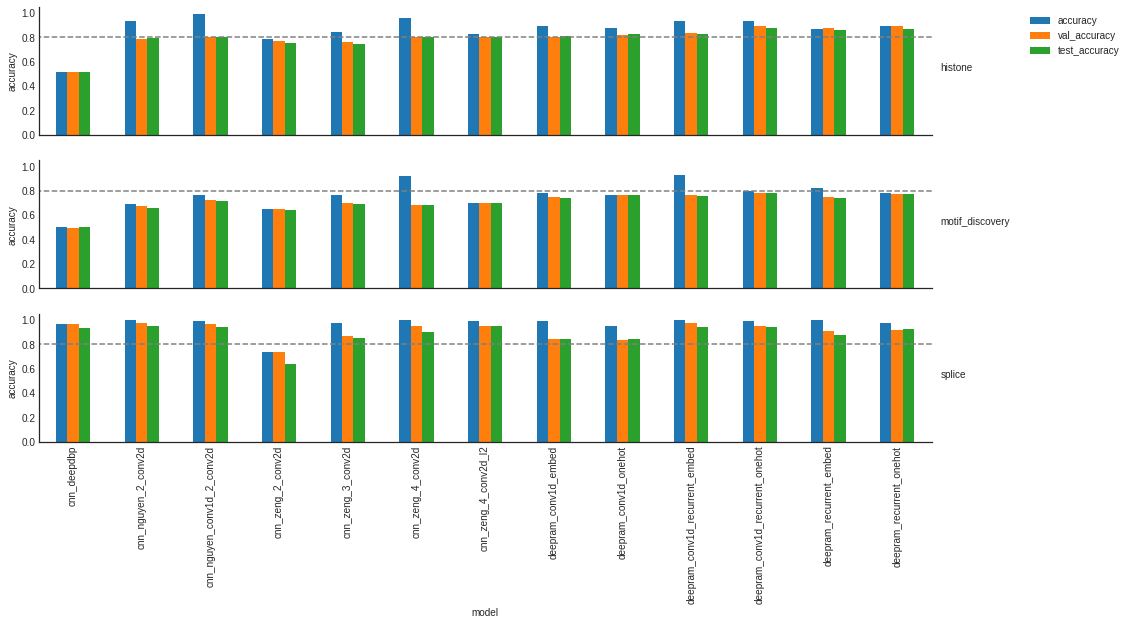

In [ ]:
Image(FIGURE_DIR + 'accuracy.png')

In [ ]:
pr_files = [file for file in os.listdir(RESULT_DIR) if file.endswith('pr.csv')]
for pr_file in pr_files:
    df = pd.read_csv(RESULT_DIR + pr_file)
    if len(df.columns) not in {3, 4}:
        print(pr_file, len(df.columns))